# Bike Price Prediction

**Import Libraries**

In [1]:
import pandas as pd

In [2]:
import numpy as np

**Import CSV File**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Lorddhaval/Dataset/patch-1/Bike%20Prices.csv')

In [4]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859


In [5]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,625.000000,625.000000,625.000000,625.000000
mean,58340.276800,2014.803200,32704.651200,86054.648000
std,53186.944553,3.020441,45508.553232,61173.244185
min,6000.000000,2001.000000,380.000000,30490.000000
25%,30000.000000,2013.000000,13125.000000,54852.000000
50%,45000.000000,2015.000000,25000.000000,72532.000000
75%,65000.000000,2017.000000,40000.000000,87000.000000
max,760000.000000,2020.000000,585659.000000,752020.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              625 non-null    object
 1   Model              625 non-null    object
 2   Selling_Price      625 non-null    int64 
 3   Year               625 non-null    int64 
 4   Seller_Type        625 non-null    object
 5   Owner              625 non-null    object
 6   KM_Driven          625 non-null    int64 
 7   Ex_Showroom_Price  625 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 39.2+ KB


**Summary**

In [7]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Vespa         2
BMW           1
Hyosung       1
Harley        1
Benelli       1
Yo            1
dtype: int64

In [8]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Bajaj Discover 125                            16
Yamaha FZ S V 2.0                             16
                                              ..
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Royal Enfield Classic Signals                  1
Yo Style                                       1
Length: 182, dtype: int64

In [9]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     622
Dealer           3
dtype: int64

In [10]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     65
3rd owner      3
4th owner      1
dtype: int64

In [11]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [12]:
df.shape

(625, 8)

In [13]:
df.replace({'Seller_Type':{'Individual':0, 'Dealer':1}},inplace=True)

In [14]:
df.replace({'Owner':{'1st owner':0, '2nd owner' :1, '3rd owner':2, '4th owner':3}},inplace=True)

**X = Dependent Variable Y = Independent Variable**

In [15]:
y = df['Selling_Price']

In [16]:
y.shape

(625,)

In [17]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
620    300000
621    330000
622    300000
623    425000
624    760000
Name: Selling_Price, Length: 625, dtype: int64

In [18]:
X = df[['Year', 'Seller_Type', 'Owner' ,'KM_Driven','Ex_Showroom_Price']]

In [19]:
X.shape

(625, 5)

In [20]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490
1,2017,0,0,35000,32000
2,2011,0,0,10000,37675
3,2010,0,0,43000,42859
4,2012,0,1,35000,42859
...,...,...,...,...,...
620,2016,0,0,9800,360000
621,2014,0,3,6500,534000
622,2011,0,0,12000,589000
623,2017,0,1,13600,599000


In [21]:
df.isnull().sum()

Brand                0
Model                0
Selling_Price        0
Year                 0
Seller_Type          0
Owner                0
KM_Driven            0
Ex_Showroom_Price    0
dtype: int64

**Train Test Split**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=222529)

In [24]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((437, 5), (188, 5), (437,), (188,))

**Training Model**

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

**Model Prediction**

In [28]:
y_pred = lr.predict(X_test)

In [29]:
y_pred.shape

(188,)

In [30]:
y_pred

array([ 31759.32474385,  55237.05274622,  60121.03586235,  30803.18577461,
        53237.76993015, 108635.64688659,  34630.69688215,  50827.86201481,
        53708.62467878,  60942.38885848,  66293.4201599 ,  35174.5194408 ,
        27826.51406499,  37096.75105987, 217395.29408853, 108594.63042171,
        50066.33785154,  81313.938386  , 142903.56624846,   4100.34180873,
       122830.55392246,  35274.78191051,  39538.13632234,  50050.81338784,
       162983.77523037,  29269.22842946,  94944.90356804, 106158.04967605,
        49577.20798692, 125708.50476877,  61472.10323626,  78676.98557534,
       142237.10124738,  51945.53945345,  47393.61800112,  21859.84796742,
        41022.1013205 ,  39674.85787195,  -4712.43036748,  21997.9643948 ,
        55037.53488096, 146589.57684363,  31161.0699252 ,  60137.17204346,
        49636.2573764 ,  79316.18985605,  73179.72040915, 145826.47822091,
        78743.89223445,  24872.56849914,  23999.9742424 , 168031.14691095,
       105251.62085873, 1

**Model Evaluation**

In [31]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [32]:
mean_squared_error(y_test,y_pred)

357601048.3018144

In [33]:
mean_absolute_error(y_test,y_pred)

11805.735959423379

In [34]:
r2_score(y_test,y_pred)

0.8332147278406558

**Visualization of Actual Vs Predicted Results**

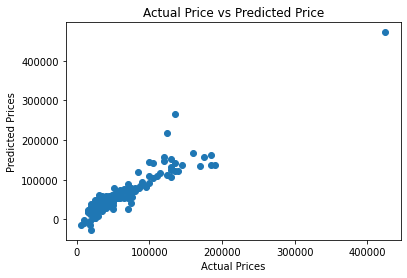

In [35]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price") 
plt.show()

**Future Predictions**

In [36]:
df_new = df.sample(1)

In [37]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
381,Yamaha,Yamaha FZ S [2012-2016],40000,2014,0,0,27785,79432


In [38]:
df_new.shape

(1, 8)

In [39]:
X_new = df_new.drop(['Brand', 'Model', 'Selling_Price'], axis = 1)

In [40]:
y_pred_new = lr.predict(X_new)

In [41]:
y_pred_new

array([50527.21226623])